In [1]:
import pickle
import jax.numpy as jnp
import jax
jax.config.update('jax_enable_x64',True)
import pathlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
f1_vals = {}
l2_error = {}

file_paths = list(pathlib.Path('results').glob("*.pkl"))
def get_properties(path):
	pieces = str(path).split('_')
	noise_level = pieces[4]
	time_length = pieces[-1][:-4]
	run = pieces[1]
	return run,float(noise_level),float(time_length)

for pkl_file in file_paths:
	run,noise,length = get_properties(str(pkl_file))
	with open(pkl_file, 'rb') as file:
		results = pickle.load(file)
		f1_vals[(run,noise,length)] = results['coeff_mets']['f1']
		l2_error[(run,noise,length)] = results['coeff_mets']['coeff_rel_l2']

In [3]:
df_f1 = pd.DataFrame(
	{(run,noise, length): val for (run,noise, length), val in f1_vals.items()},
	index=[0]
).T.reset_index()
df_f1.columns = ['run','noise', 'length', 'f1']
df_f1['recovered'] = (df_f1['f1']==1).astype('int')
df_f1.groupby(['noise','length'])['recovered'].mean()
# df_f1 = df_f1.pivot(index='noise', columns='length', values='f1')

noise  length
0.025  4.0       0.875
       5.0       1.000
       6.0       0.875
       7.0       0.875
       8.0       1.000
                 ...  
0.400  6.0       0.000
       7.0       0.125
       8.0       0.125
       9.0       0.125
       10.0      0.125
Name: recovered, Length: 112, dtype: float64

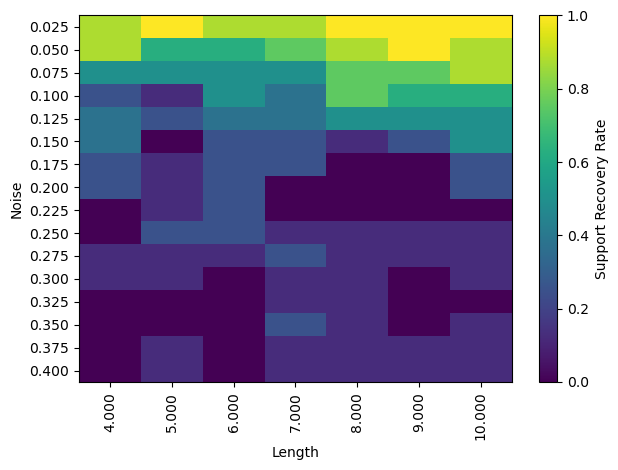

In [4]:
df_f1 = pd.DataFrame(
	{(run,noise, length): val for (run,noise, length), val in f1_vals.items()},
	index=[0]
).T.reset_index()
df_f1.columns = ['run','noise', 'length', 'f1']
df_f1['recovered'] = (df_f1['f1']==1).astype('int')
# df_f1.groupby(['noise','length'])['recovered'].mean()
df_f1.sort_values(['length','noise','run'])

df_recovery = df_f1.groupby(['noise','length'])['recovered'].mean().unstack(level = 'length')

df_f1 = df_f1.groupby(['noise','length'])['f1'].mean().unstack(level = 'length')

df_recovery = df_recovery.loc[::-1]
plt.imshow(df_recovery, aspect='auto', origin='lower')
plt.colorbar(label='Support Recovery Rate')
plt.xticks(ticks=np.arange(len(df_recovery.columns)), labels=[f"{col:.3f}" for col in df_recovery.columns], rotation=90)
plt.yticks(ticks=np.arange(len(df_recovery.index)), labels=[f"{idx:.3f}" for idx in df_recovery.index])
plt.xlabel('Length')
plt.ylabel('Noise')
plt.tight_layout()

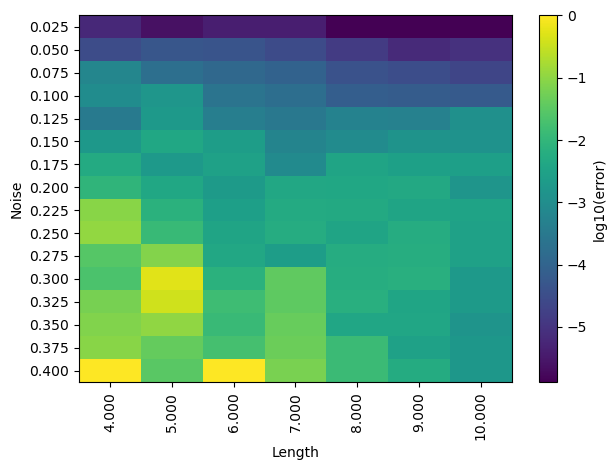

In [5]:
df_error = pd.DataFrame(
	{(run,noise, length): val for (run,noise, length), val in l2_error.items()},
	index=[0]
).T.reset_index()
df_error.columns = ['run','noise', 'length', 'error']
df_error = df_error.groupby(['noise','length'])['error'].mean()
df_error = df_error.unstack(level='length')
df_error = df_error.loc[::-1]

plt.imshow(np.log(df_error), aspect='auto', origin='lower', vmax=0)
plt.colorbar(label='log10(error)')
plt.xticks(ticks=np.arange(len(df_error.columns)), labels=[f"{col:.3f}" for col in df_error.columns], rotation=90)
plt.yticks(ticks=np.arange(len(df_error.index)), labels=[f"{idx:.3f}" for idx in df_error.index])
plt.xlabel('Length')
plt.ylabel('Noise')
plt.tight_layout()